# Results

## #1 Summarisation Task

Patient ID, Text Length

1. Trial 1: 20015730, 24729
2. Trial 2: 20022465, 9219
3. Trial 3: 20050336, 16691

For all models: chunk_size=2048, chunk_overlap=100

Behaviour Score
| Model | Trial 1 | Trial 2 | Trial 3 | Average |
| --------------- | --------------- | --------------- | --------------- | --------------- |
|stablelm-zephyr:3b| 4 | 6 | 3|  4.3 |
|llama3| 7 | 6 | 7 | 6.7 |
|phi3:mini| 6 | 7 | 2| 5 |
|gemma| 7 | 5 | 5 | 5.7 |
|mistral| 3 | 4 | 5 | 4 |

The behaviour score was provided based on the following criteria: 
* Capturing meaningful information (1-5)
* Understanding text structure (1-5)

Time Score

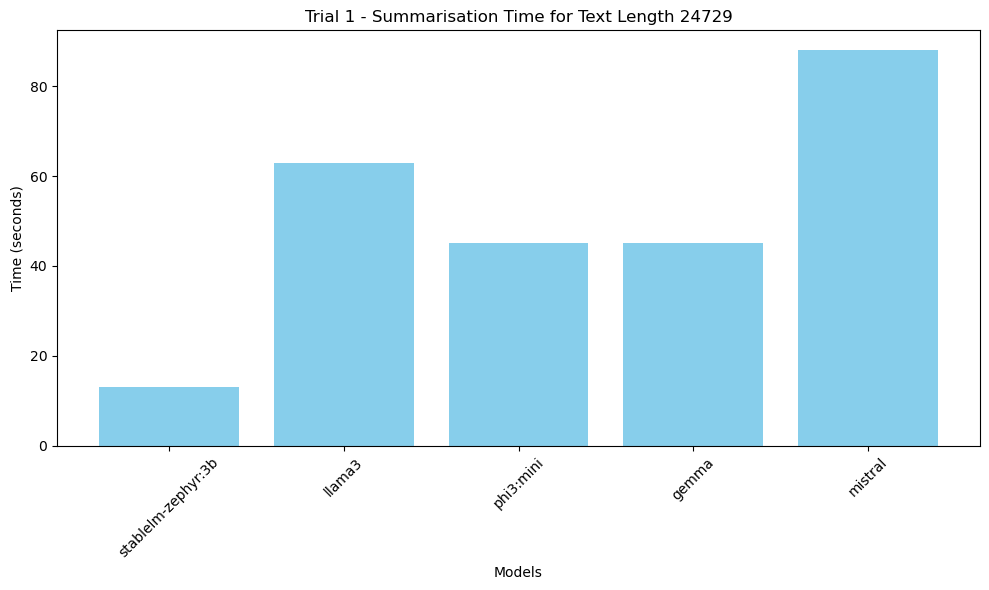

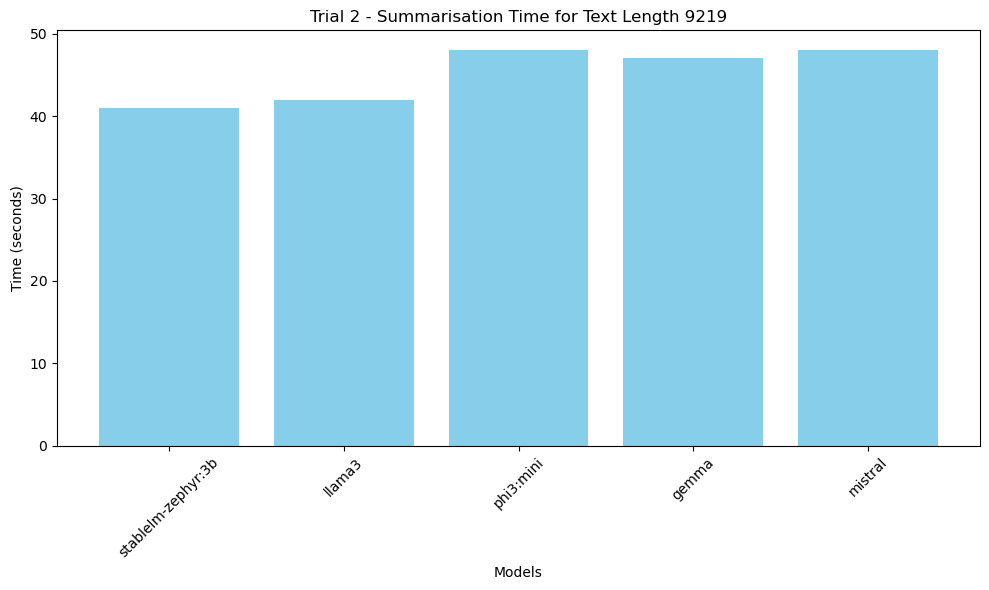

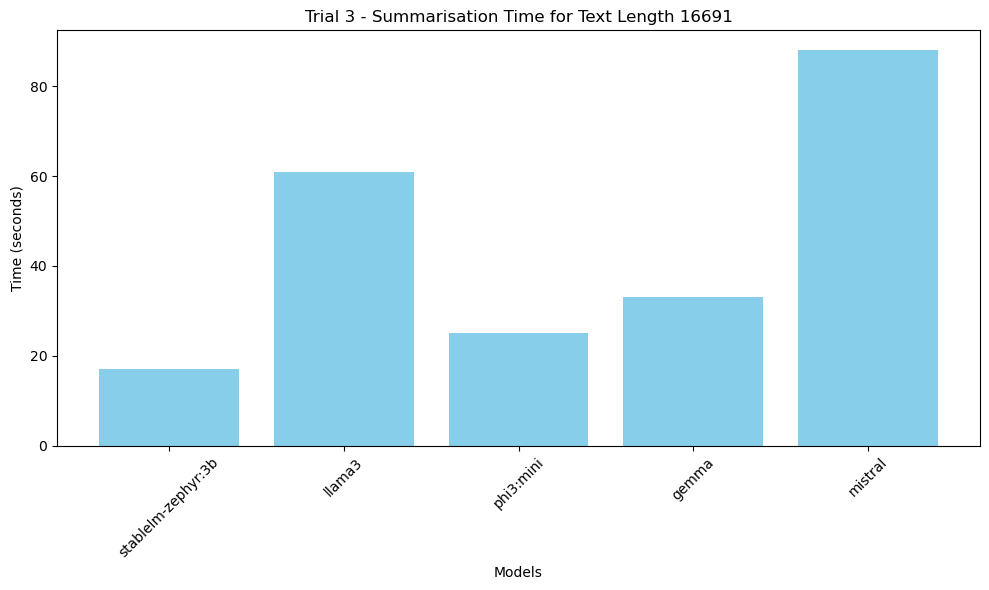

In [14]:
import matplotlib.pyplot as plt

def plot_summarization_times(model_names, text_length, times, trial_name, image_name):
    plt.figure(figsize=(10, 6))
    plt.bar(model_names, times, color='skyblue')
    plt.xlabel('Models')
    plt.ylabel('Time (seconds)')
    plt.title(f'{trial_name} - Summarisation Time for Text Length {text_length}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig(image_name)
    plt.show()

# Data for trials
model_names = ["stablelm-zephyr:3b", "llama3", "phi3:mini", "gemma", "mistral"]

# Trial 1
trial_1_text_length = 24729
trial_1_time = [13, 63, 45, 45, 88]
plot_summarization_times(model_names, trial_1_text_length, trial_1_time, 'Trial 1', 'trial1-time.png')

# Trial 2
trial_2_text_length = 9219
trial_2_time = [41, 42, 48, 47, 48]
plot_summarization_times(model_names, trial_2_text_length, trial_2_time, 'Trial 2', 'trial2-time.png')

# Trial 3
trial_3_text_length = 16691
trial_3_time = [17, 61, 25, 33, 88]
plot_summarization_times(model_names, trial_3_text_length, trial_3_time, 'Trial 3', 'trial3-time.png')

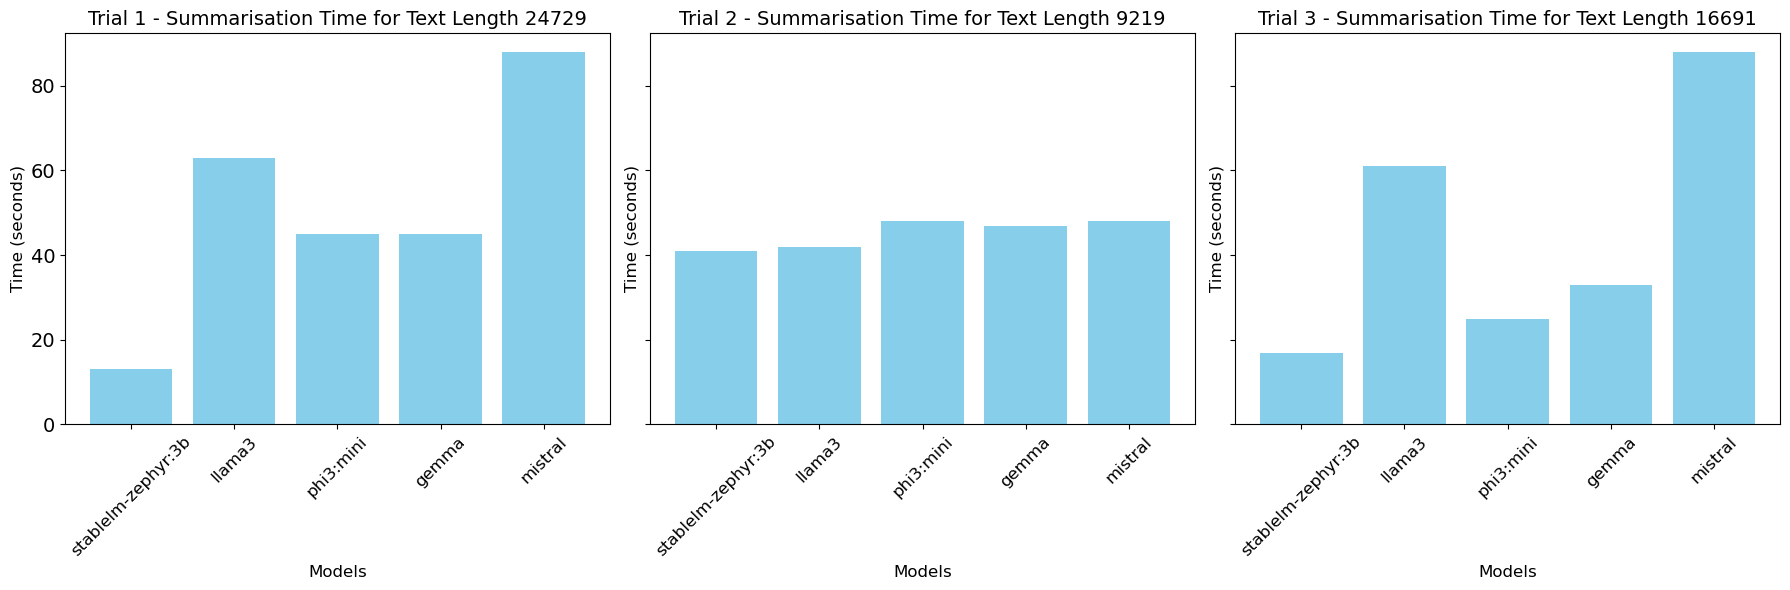

In [15]:
import matplotlib.pyplot as plt

def plot_summarization_times(ax, model_names, text_length, times, trial_name):
    ax.bar(model_names, times, color='skyblue')
    ax.set_xlabel('Models', fontsize=12)
    ax.set_ylabel('Time (seconds)', fontsize=12)
    ax.set_title(f'{trial_name} - Summarisation Time for Text Length {text_length}', fontsize=14)
    ax.tick_params(axis='x', rotation=45, labelsize=12)
    ax.tick_params(axis='y', labelsize=14)

# Data for trials
model_names = ["stablelm-zephyr:3b", "llama3", "phi3:mini", "gemma", "mistral"]

# Trial data
trials = [
    {"text_length": 24729, "times": [13, 63, 45, 45, 88], "trial_name": 'Trial 1'},
    {"text_length": 9219, "times": [41, 42, 48, 47, 48], "trial_name": 'Trial 2'},
    {"text_length": 16691, "times": [17, 61, 25, 33, 88], "trial_name": 'Trial 3'}
]

# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Plot each trial
for ax, trial in zip(axs, trials):
    plot_summarization_times(ax, model_names, trial["text_length"], trial["times"], trial["trial_name"])

plt.tight_layout()
plt.savefig('summarization_times.png')
plt.show()


## #2 Pneumonia Task

Behaviour Score
| Model                | Trial 1 | Trial 2 | Trial 3 | Trial 4 | Average |
|----------------------|---------|---------|---------|---------|---------|
| stablelm-zephyr:3b   |   6      |     8    |     7    |    5 (Incorrect)     |   6.5      |
| llama3               |    8     |    7     |   8      |    9     |     8    |
| phi3:mini            |    8     |    7     |    7     |   5 (Incorrect)      |   6.75      |
| gemma                |    5     |     6    |    6    |   4 (Incorrect)      |    5.25     |
| mistral              |    8     |    9     |    8     |    8     |   8.5      |

Most of the models displayed strong NER and medical reasoning for the first 3 trials. Gemma did well with NER but not great reasoning based on medical evidence. In trial 4, only mistral and llama3 caught the fact that "The text mentions that upon discharge, the patient's CXR (chest X-ray) showed a new RLL (right lower lobe) infiltrate and he was started on cefepime and Vanco empirically (which are antibiotics typically used for pneumonia)". They exhibited more enhanced medical reasoning capabilities than the other models.

Correct vs Incorrect
| Responses               | Trial 1 | Trial 2 | Trial 3 | Trial 4 |
|-------------------------|---------|---------|---------|---------|
| correct response        | Y       | Y       | N       | Y       |
| stablelm-zephyr:3b      | Y       | Y       | N       | N       |
| llama3                  | Y       | Y       | N       | Y       |
| phi3:mini               | Y       | Y       | N       | N       |
| gemma                   | Y       | Y       | N       | N       |
| mistral                 | Y       | Y       | N       | Y       |



For all models: chunk_size=4096, chunk_overlap=100

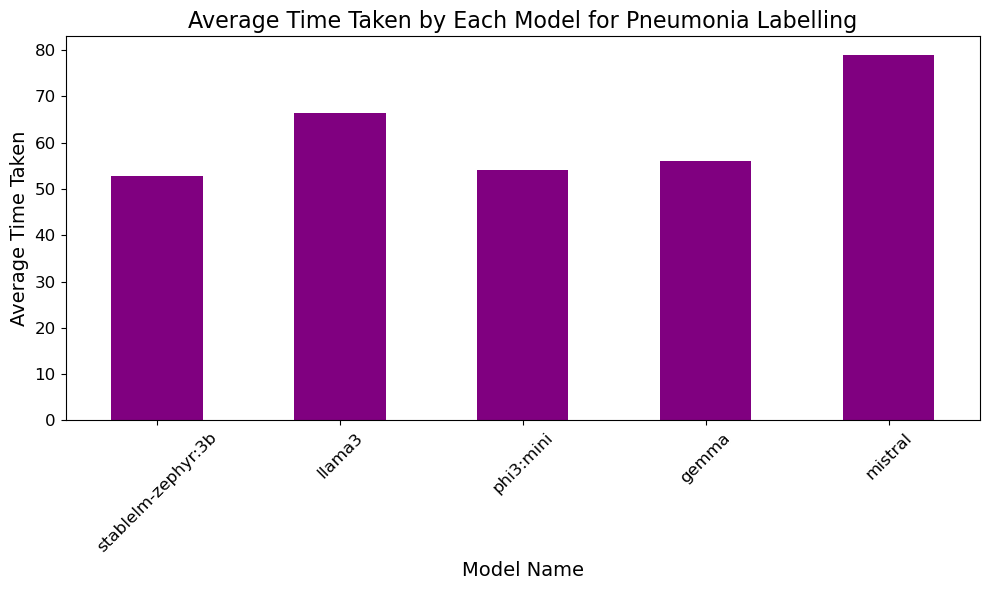

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
file_path = 'prompt-results/pneumonia-model-outputs.csv'
data = pd.read_csv(file_path)

# List of models to analyze
models = ['stablelm-zephyr:3b', 'llama3', 'phi3:mini', 'gemma', 'mistral']

# Calculate the average time taken for each model
average_pneumonia_times = data[data['model_name'].isin(models)].groupby('model_name')['time_taken'].mean()

# Reindex to ensure the specified order
average_pneumonia_times = average_pneumonia_times.reindex(models)

# Plot the results in a bar chart
plt.figure(figsize=(10, 6))
average_pneumonia_times.plot(kind='bar', color='purple')
plt.title('Average Time Taken by Each Model for Pneumonia Labelling', fontsize=16)
plt.xlabel('Model Name', fontsize=14)
plt.ylabel('Average Time Taken', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

# Save the plot as an image file or display it
plt.savefig('average_time_taken_pneumonia.png')
plt.show()


## #3 Bilateral Infiltrates Task

Behaviour Score
| Model                | Trial 1 | Trial 2 | Trial 3 | Trial 4 | Trial 5 | Trial 6 | Average |
|----------------------|---------|---------|---------|---------|---------|---------|---------|
| stablelm-zephyr:3b   |    5     |   3      |    5 (Incorrect)    |    4  (Incorrect)   |   4  (Incorrect)    |   4     |    4.17     |
| llama3               |    7     |   8      |    7     |    7     |    5  (Incorrect)   |    8     |    7     |
| phi3:mini            |    7     |    7     |    4 (Incorrect)      |   6      |    7     |  6       |   6.17      |
| gemma                |    6     |     5    |   4  (Incorrect)    |   3  (Incorrect)    |   4  (Incorrect)    |   5      |    4.50     |
| mistral              |    8     |    6     |     5 (Incorrect)     |     7    |   8      |   6     |    6.67     |


Correct vs Incorrect
| Responses                | Trial 1 | Trial 2 | Trial 3 | Trial 4 | Trial 5 | Trial 6 |
|----------------------|---------|---------|---------|---------|---------|---------|
| correct response| N | N | Y | Y | Y | N |
| stablelm-zephyr:3b   |    N     |   N      |    N     |    N     |    N     |    N     |
| llama3               |   N      |   N      |    Y     |    Y     |     N    |    N     |
| phi3:mini            |    N     |   N      |    N     |    Y     |     Y    |    N     |
| gemma                |    N     |   N      |    N     |    N     |     N    |    N     |
| mistral              |   N      |   N      |    N     |    Y     |    Y     |    N     |




For all models: chunk_size=4096, chunk_overlap=100

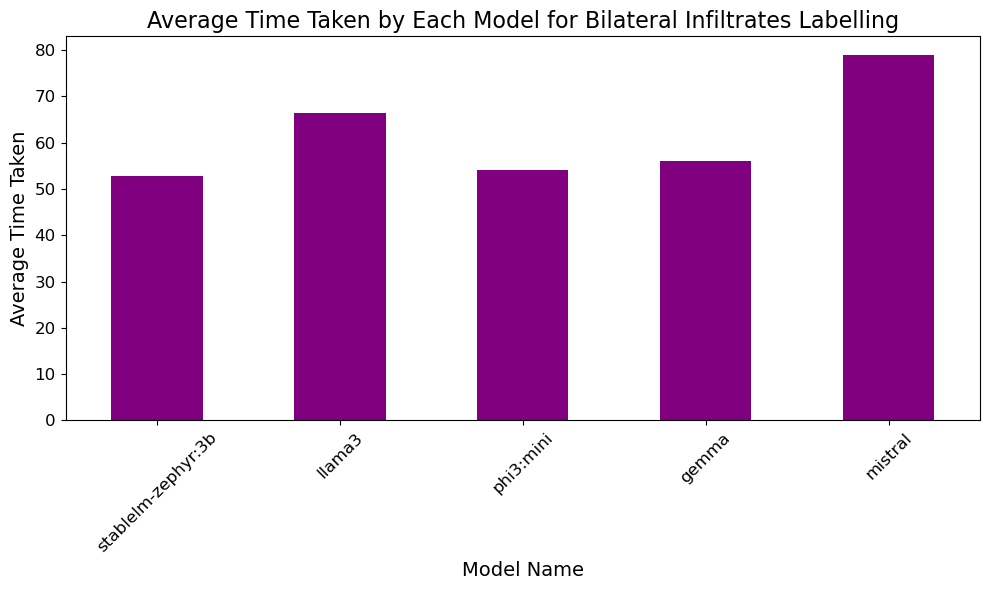

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
file_path = 'prompt-results/bi-model-output.csv'
data = pd.read_csv(file_path)

# List of models to analyze
models = ['stablelm-zephyr:3b', 'llama3', 'phi3:mini', 'gemma', 'mistral']

# Calculate the average time taken for each model
average_times = data[data['model_name'].isin(models)].groupby('model_name')['time_taken'].mean()

# Reindex to ensure the specified order
average_times = average_times.reindex(models)

# Plot the results in a bar chart
plt.figure(figsize=(10, 6))
average_pneumonia_times.plot(kind='bar', color='purple')
plt.title('Average Time Taken by Each Model for Bilateral Infiltrates Labelling', fontsize=16)
plt.xlabel('Model Name', fontsize=14)
plt.ylabel('Average Time Taken', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

# Save the plot as an image file or display it
plt.savefig('average_time_taken_bi.png')
plt.show()


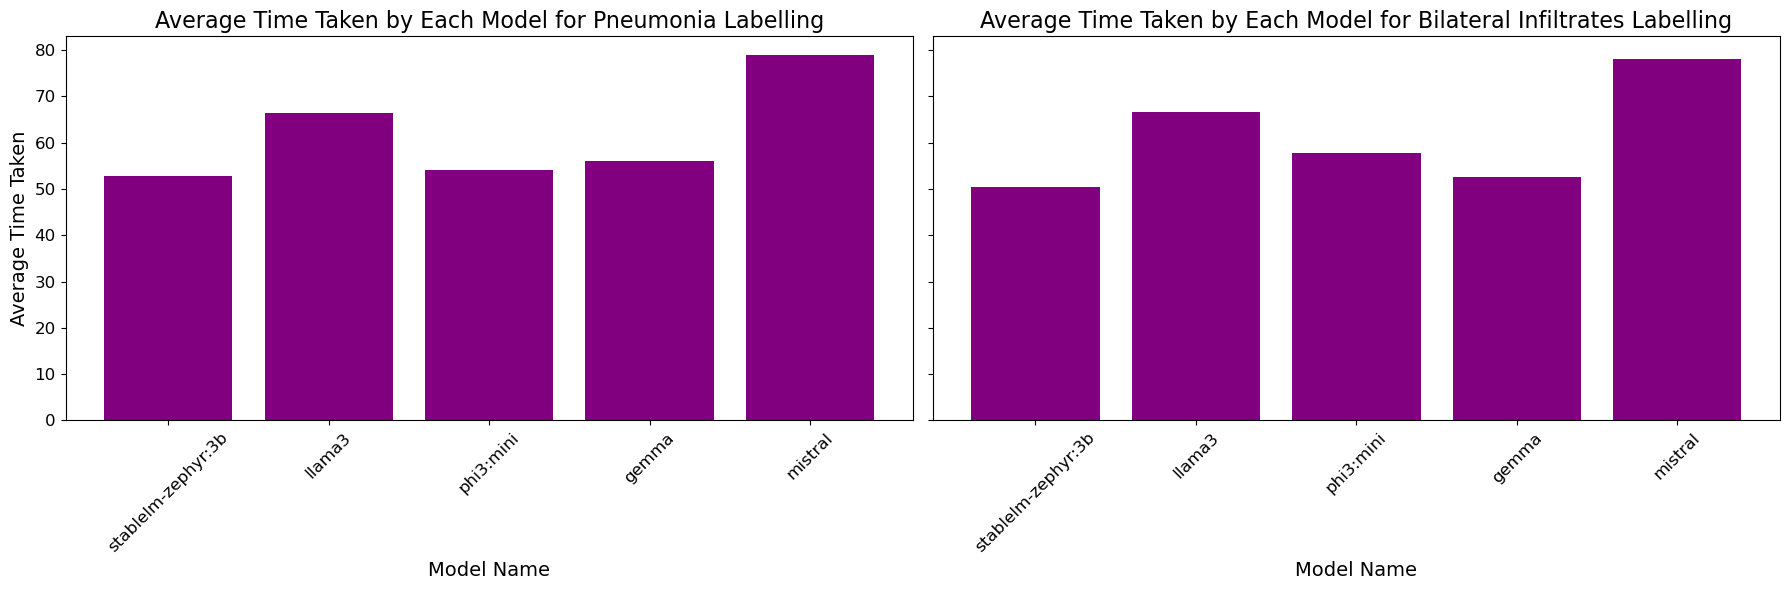

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV files
pneumonia_file_path = 'prompt-results/pneumonia-model-outputs.csv'
bi_file_path = 'prompt-results/bi-model-output.csv'
pneumonia_data = pd.read_csv(pneumonia_file_path)
bi_data = pd.read_csv(bi_file_path)

# List of models to analyze
models = ['stablelm-zephyr:3b', 'llama3', 'phi3:mini', 'gemma', 'mistral']

# Calculate the average time taken for each model
average_pneumonia_times = pneumonia_data[pneumonia_data['model_name'].isin(models)].groupby('model_name')['time_taken'].mean()
average_bi_times = bi_data[bi_data['model_name'].isin(models)].groupby('model_name')['time_taken'].mean()

# Reindex to ensure the specified order
average_pneumonia_times = average_pneumonia_times.reindex(models)
average_bi_times = average_bi_times.reindex(models)

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(18, 6), sharey=True)

# Plot the pneumonia data
axs[0].bar(average_pneumonia_times.index, average_pneumonia_times, color='purple')
axs[0].set_title('Average Time Taken by Each Model for Pneumonia Labelling', fontsize=16)
axs[0].set_xlabel('Model Name', fontsize=14)
axs[0].set_ylabel('Average Time Taken', fontsize=14)
axs[0].tick_params(axis='x', rotation=45, labelsize=12)
axs[0].tick_params(axis='y', labelsize=12)

# Plot the bilateral infiltrates data
axs[1].bar(average_bi_times.index, average_bi_times, color='purple')
axs[1].set_title('Average Time Taken by Each Model for Bilateral Infiltrates Labelling', fontsize=16)
axs[1].set_xlabel('Model Name', fontsize=14)
axs[1].tick_params(axis='x', rotation=45, labelsize=12)
axs[1].tick_params(axis='y', labelsize=12)

plt.tight_layout()
plt.savefig('average_time_taken_comparison.png')
plt.show()
